In [1]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


# Лабораторная работа №3

Пусть дана двумерная функция $f(x) = x_1 ^ 2 + x_2 ^ 2 + x_1 + x_2$, где $x=(x_1, \; x_2) \in R^2$.

In [2]:
def f(x):
    return x[0] ** 2 + x[1] ** 2 + x[0] + x[1]

## Визуализация

Будем рассматривать на отрезках от $-5$ до $5$, подготовим для этого данные:

In [3]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y)
Z = f([X, Y])

Построим трёхмерный график:

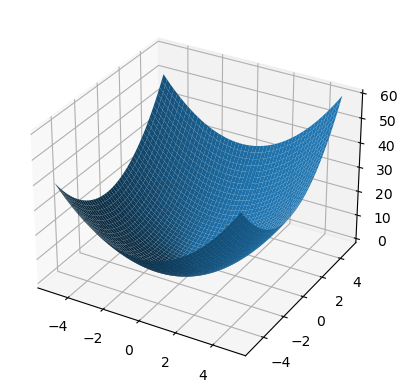

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
pass

Также построим график линий уровня:

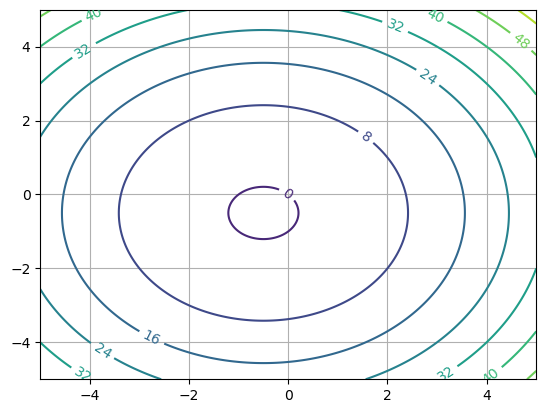

In [5]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
plt.grid()
pass

## Поиск локальных минимумов

Используя функцию minimize из scipy.optimize можем численно отыскать локальный минимум. Для этого задим начальное приближение $x^0 = (-1, \; 1)$. Границы возьмём те же.

In [6]:
from scipy.optimize import minimize
res = minimize(f, x0=[-1, 1], bounds=[[-5, 5], [-5, 5]])

Получили следующий результат:

In [7]:
loc_min = res['x']
loc_min, f(loc_min)

(array([-0.5       , -0.50000001]), -0.5)

То есть локальный минимум есть точка $x = (-0.5, -0.5)$ со значением $f(x) = -0.5$.

Изобразим его на графике линий уровня:

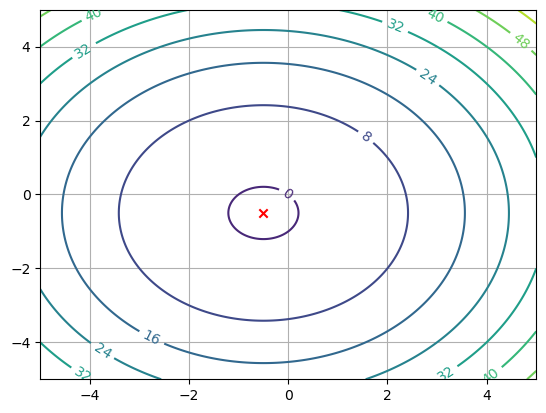

In [8]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.scatter(loc_min[0], loc_min[1], c='red', marker='x')
plt.grid()
pass

## Взятие градиента


Используем sympy и возьмём градиент символьно.

In [9]:
from sympy.abc import x, y
eq = x ** 2 + y ** 2 + x + y
[eq.diff(var) for var in [x, y]]

[2*x + 1, 2*y + 1]

Получили, что вектор градиента есть $(\frac{\partial f}{\partial x}, \; \frac{\partial f}{\partial y}) = (2x+1, \; 2y+1)$.